<img width="300px" src="https://cachimbo.pe/wp-content/uploads/2022/10/1-19.jpg"></img>

#**Matemática y Estadística para Ciencia de Datos**
## **Tema: PCA y LDA**
#### **Docente: Giron Rene Omar A.**

---------------

# PCA

Pasos
1. Centrar los datos
2. Calcular la matriz de covarianza
3. Encontrar autovalores y autovectores
4. Ordenar autovalores y seleccionar autovectores principales
5. Proyectar los datos en los nuevos ejes

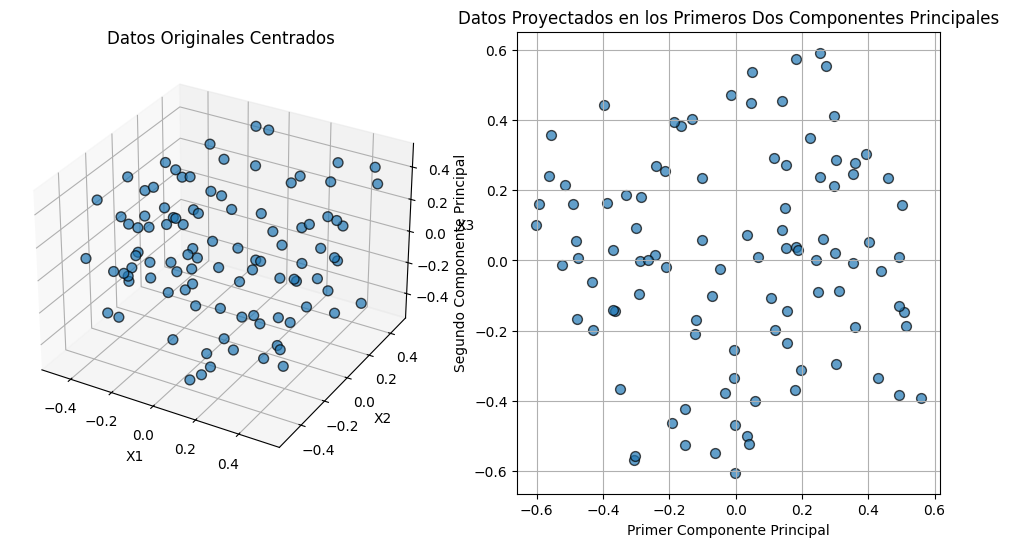

Autovalores:
[0.09851675 0.08782199 0.0746782 ]

Autovectores:
[[ 0.36310609 -0.54821599  0.75340109]
 [ 0.89784554  0.42200161 -0.12565041]
 [-0.24905291  0.72206224  0.64544463]]

Datos originales centrados:
[[-0.10230911  0.43825294  0.23569075]
 [ 0.12180925 -0.35644273 -0.34030867]
 [-0.41876562  0.35371478  0.10481182]
 [ 0.23122334 -0.49187688  0.47360666]
 [ 0.35559341 -0.30012226 -0.31447823]]

Datos proyectados (primeras 5 filas):
[[ 0.29763492  0.41121432]
 [-0.19104597 -0.46292123]
 [ 0.1394212   0.45452287]
 [-0.47562397  0.00764032]
 [-0.06202359 -0.54866692]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar un conjunto de datos aleatorio
np.random.seed(42)
X = np.random.rand(100, 3)

# Paso 1: Centrar los datos
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Paso 2: Calcular la matriz de covarianza
cov_matrix = np.cov(X_centered, rowvar=False)

# Paso 3: Encontrar autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Paso 4: Ordenar autovalores y seleccionar autovectores principales
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Seleccionar los primeros k autovectores (por ejemplo, k=2)
k = 2
eigenvector_subset = sorted_eigenvectors[:, 0:k]

# Paso 5: Proyectar los datos en los nuevos ejes
X_reduced = np.dot(X_centered, eigenvector_subset)

# Gráfico de los datos originales en 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2], edgecolor='k', s=50, alpha=0.7)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')
ax1.set_title('Datos Originales Centrados')

# Gráfico de los datos proyectados en 2D
ax2 = fig.add_subplot(122)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', s=50, alpha=0.7)
ax2.set_xlabel('Primer Componente Principal')
ax2.set_ylabel('Segundo Componente Principal')
ax2.set_title('Datos Proyectados en los Primeros Dos Componentes Principales')
ax2.grid()

plt.show()

# Imprimir los resultados
print("Autovalores:")
print(sorted_eigenvalues)

print("\nAutovectores:")
print(sorted_eigenvectors)

print("\nDatos originales centrados:")
print(X_centered[:5])  # Muestra las primeras 5 filas

print("\nDatos proyectados (primeras 5 filas):")
print(X_reduced[:5])

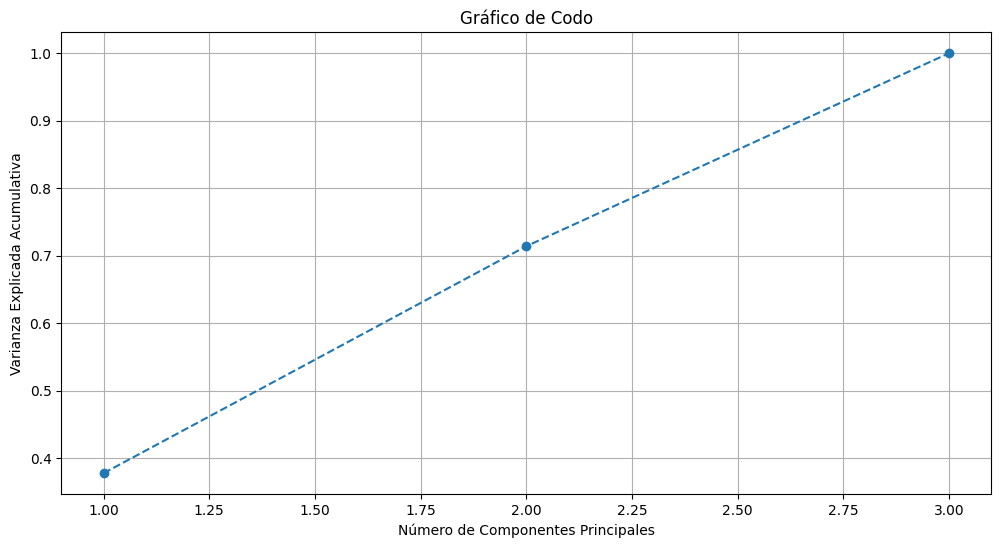

Número de componentes principales según el criterio de Kaiser: 0


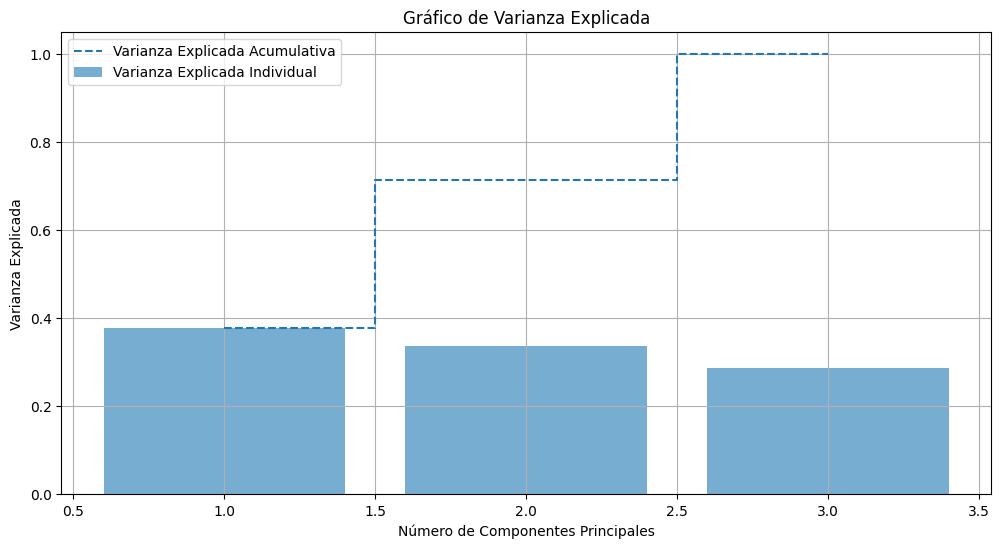

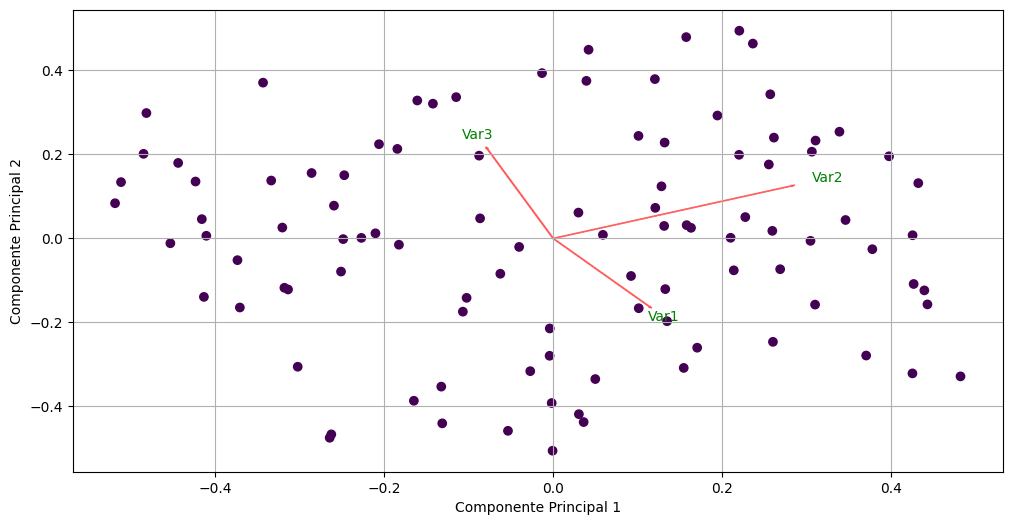

Autovalores:
[0.09851675 0.08782199 0.0746782 ]

Autovectores:
[[ 0.36310609 -0.54821599  0.75340109]
 [ 0.89784554  0.42200161 -0.12565041]
 [-0.24905291  0.72206224  0.64544463]]

Cargas Factoriales:
[[ 0.11396948 -0.16246257  0.20588427]
 [ 0.28181018  0.12505923 -0.03433688]
 [-0.07817118  0.21398152  0.17638267]]

Datos proyectados (primeras 5 filas):
[[ 0.29763492  0.41121432  0.01997887]
 [-0.19104597 -0.46292123 -0.08309201]
 [ 0.1394212   0.45452287 -0.29229266]
 [-0.47562397  0.00764032  0.54169533]
 [-0.06202359 -0.54866692  0.10263666]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Generar un conjunto de datos aleatorio
np.random.seed(42)
X = np.random.rand(100, 3)

# Paso 1: Centrar los datos
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Paso 2: Calcular la matriz de covarianza
cov_matrix = np.cov(X_centered, rowvar=False)

# Paso 3: Encontrar autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Paso 4: Ordenar autovalores y seleccionar autovectores principales
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Paso 5: Proyectar los datos en los nuevos ejes
X_reduced = np.dot(X_centered, sorted_eigenvectors)

# Graficar el gráfico de codo
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Gráfico de Codo')
plt.grid()
plt.show()

# Aplicar el criterio de Kaiser
kaiser_criterion = np.sum(sorted_eigenvalues > 1)
print(f'Número de componentes principales según el criterio de Kaiser: {kaiser_criterion}')

# Gráfico de varianza explicada
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, align='center',
        label='Varianza Explicada Individual')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', linestyle='--',
         label='Varianza Explicada Acumulativa')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Gráfico de Varianza Explicada')
plt.legend(loc='best')
plt.grid()
plt.show()

# Calcular las cargas factoriales
factor_loadings = sorted_eigenvectors * np.sqrt(sorted_eigenvalues)

# Biplot
def biplot(score, coeff, y, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

plt.figure(figsize=(12, 6))
biplot(X_reduced[:, :2], factor_loadings[:, :2], y=np.zeros(X_reduced.shape[0]), labels=['Var1', 'Var2', 'Var3'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

# Imprimir los resultados
print("Autovalores:")
print(sorted_eigenvalues)

print("\nAutovectores:")
print(sorted_eigenvectors)

print("\nCargas Factoriales:")
print(factor_loadings)

print("\nDatos proyectados (primeras 5 filas):")
print(X_reduced[:5])


# LDA

## Caso 1

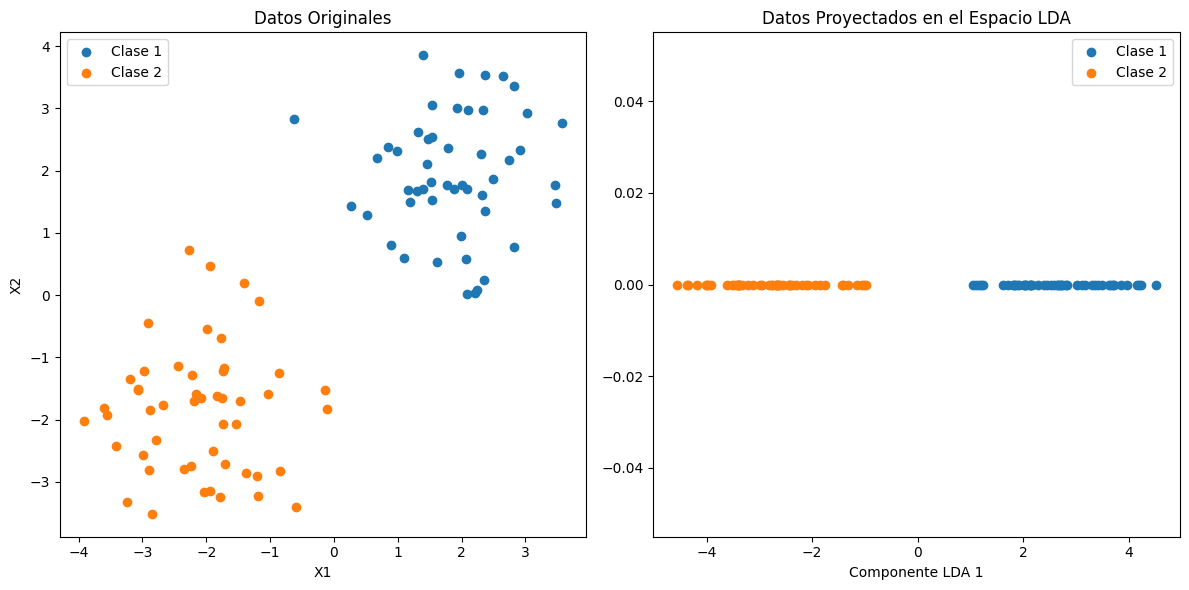

Autovalores:
[8.81705278e+00 4.44089210e-16]

Autovectores:
[[ 0.81835864 -0.69125195]
 [ 0.57470786  0.72261382]]

Datos proyectados (primeras 5 filas):
[[3.11316176]
 [4.19147177]
 [2.45995123]
 [4.51954625]
 [2.71374812]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generar un conjunto de datos simple
np.random.seed(42)
X_class1 = np.random.randn(50, 2) + np.array([2, 2])
X_class2 = np.random.randn(50, 2) + np.array([-2, -2])
X = np.vstack((X_class1, X_class2))
y = np.array([0]*50 + [1]*50)

# Paso 1: Calcular la media de cada clase y la media global
mean_class1 = np.mean(X_class1, axis=0)
mean_class2 = np.mean(X_class2, axis=0)
mean_global = np.mean(X, axis=0)

# Paso 2: Calcular las matrices de dispersión intra-clase (S_W) y entre-clase (S_B)
S_W = np.zeros((2, 2))
for x in X_class1:
    S_W += (x - mean_class1).reshape(2, 1).dot((x - mean_class1).reshape(1, 2))
for x in X_class2:
    S_W += (x - mean_class2).reshape(2, 1).dot((x - mean_class2).reshape(1, 2))

S_B = (mean_class1 - mean_global).reshape(2, 1).dot((mean_class1 - mean_global).reshape(1, 2)) * 50
S_B += (mean_class2 - mean_global).reshape(2, 1).dot((mean_class2 - mean_global).reshape(1, 2)) * 50

# Paso 3: Calcular los autovectores y autovalores de S_W^{-1}S_B
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Paso 4: Selección de los autovectores correspondientes a los mayores autovalores
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
W = sorted_eigenvectors[:, :1]  # Seleccionamos el primer autovector

# Paso 5: Proyectar los datos en el espacio de los autovectores seleccionados
X_lda = X.dot(W)

# Visualización de los datos proyectados
plt.figure(figsize=(12, 6))

# Datos originales
plt.subplot(121)
plt.scatter(X_class1[:, 0], X_class1[:, 1], label='Clase 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], label='Clase 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos Originales')
plt.legend()

# Datos proyectados
plt.subplot(122)
plt.scatter(X_lda[y==0], np.zeros(50), label='Clase 1')
plt.scatter(X_lda[y==1], np.zeros(50), label='Clase 2')
plt.xlabel('Componente LDA 1')
plt.title('Datos Proyectados en el Espacio LDA')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir los resultados
print("Autovalores:")
print(eigenvalues)

print("\nAutovectores:")
print(eigenvectors)

print("\nDatos proyectados (primeras 5 filas):")
print(X_lda[:5])


## Caso 2

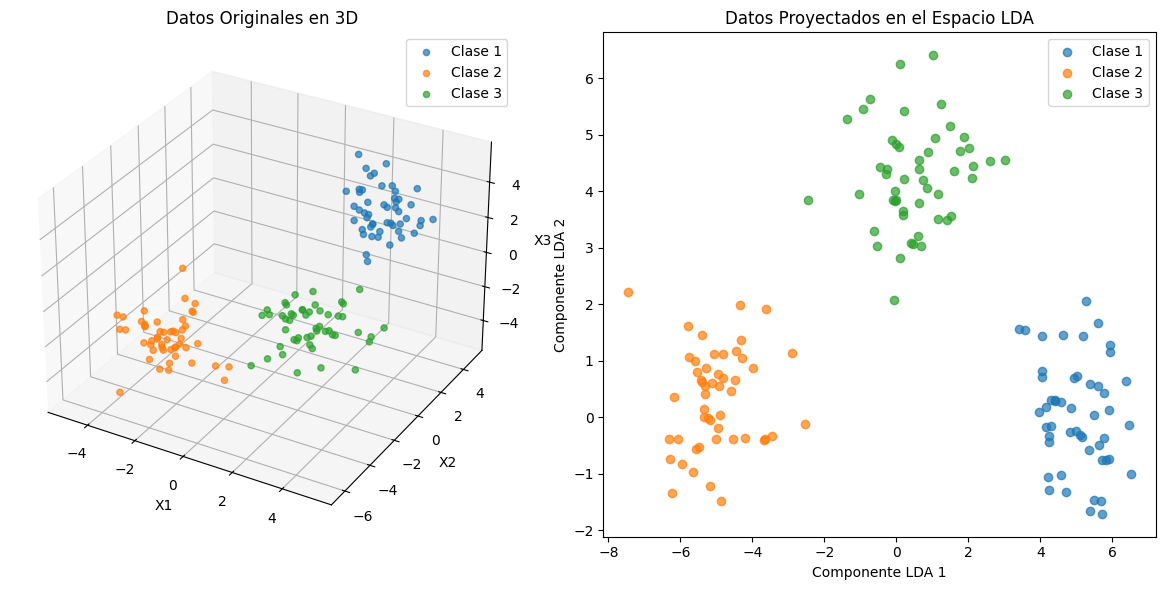

Autovalores:
[2.03429393e+01 4.60111583e+00 1.87517382e-16]

Autovectores:
[[ 0.66862606  0.72421901 -0.39601648]
 [ 0.52692323 -0.68875279 -0.39589848]
 [ 0.52468191 -0.03356236  0.82851394]]

Datos proyectados (primeras 5 filas):
[[5.7597854  0.43893338]
 [5.93280276 1.27785073]
 [6.3746509  0.63659138]
 [5.03491785 0.73345509]
 [3.40929089 1.55661467]]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar un conjunto de datos aleatorio con tres dimensiones
np.random.seed(42)
X_class1 = np.random.randn(50, 3) + np.array([3, 3, 3])
X_class2 = np.random.randn(50, 3) + np.array([-3, -3, -3])
X_class3 = np.random.randn(50, 3) + np.array([3, -3, 0])
X = np.vstack((X_class1, X_class2, X_class3))
y = np.array([0]*50 + [1]*50 + [2]*50)

# Paso 1: Calcular la media de cada clase y la media global
mean_class1 = np.mean(X_class1, axis=0)
mean_class2 = np.mean(X_class2, axis=0)
mean_class3 = np.mean(X_class3, axis=0)
mean_global = np.mean(X, axis=0)

# Paso 2: Calcular las matrices de dispersión intra-clase (S_W) y entre-clase (S_B)
S_W = np.zeros((3, 3))
for x in X_class1:
    S_W += (x - mean_class1).reshape(3, 1).dot((x - mean_class1).reshape(1, 3))
for x in X_class2:
    S_W += (x - mean_class2).reshape(3, 1).dot((x - mean_class2).reshape(1, 3))
for x in X_class3:
    S_W += (x - mean_class3).reshape(3, 1).dot((x - mean_class3).reshape(1, 3))

S_B = 50 * (mean_class1 - mean_global).reshape(3, 1).dot((mean_class1 - mean_global).reshape(1, 3))
S_B += 50 * (mean_class2 - mean_global).reshape(3, 1).dot((mean_class2 - mean_global).reshape(1, 3))
S_B += 50 * (mean_class3 - mean_global).reshape(3, 1).dot((mean_class3 - mean_global).reshape(1, 3))

# Paso 3: Calcular los autovectores y autovalores de S_W^{-1}S_B
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Paso 4: Selección de los autovectores correspondientes a los mayores autovalores
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
W = sorted_eigenvectors[:, :2]  # Seleccionamos los dos primeros autovectores

# Paso 5: Proyectar los datos en el espacio de los autovectores seleccionados
X_lda = X.dot(W)

# Visualización de los datos proyectados
plt.figure(figsize=(12, 6))

# Datos originales en 3D
ax1 = plt.subplot(121, projection='3d')
ax1.scatter(X_class1[:, 0], X_class1[:, 1], X_class1[:, 2], label='Clase 1', alpha=0.7)
ax1.scatter(X_class2[:, 0], X_class2[:, 1], X_class2[:, 2], label='Clase 2', alpha=0.7)
ax1.scatter(X_class3[:, 0], X_class3[:, 1], X_class3[:, 2], label='Clase 3', alpha=0.7)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('X3')
ax1.set_title('Datos Originales en 3D')
ax1.legend()

# Datos proyectados en 2D
ax2 = plt.subplot(122)
ax2.scatter(X_lda[y==0, 0], X_lda[y==0, 1], label='Clase 1', alpha=0.7)
ax2.scatter(X_lda[y==1, 0], X_lda[y==1, 1], label='Clase 2', alpha=0.7)
ax2.scatter(X_lda[y==2, 0], X_lda[y==2, 1], label='Clase 3', alpha=0.7)
ax2.set_xlabel('Componente LDA 1')
ax2.set_ylabel('Componente LDA 2')
ax2.set_title('Datos Proyectados en el Espacio LDA')
ax2.legend()

plt.tight_layout()
plt.show()

# Imprimir los resultados
print("Autovalores:")
print(eigenvalues)

print("\nAutovectores:")
print(eigenvectors)

print("\nDatos proyectados (primeras 5 filas):")
print(X_lda[:5])


## Caso 3

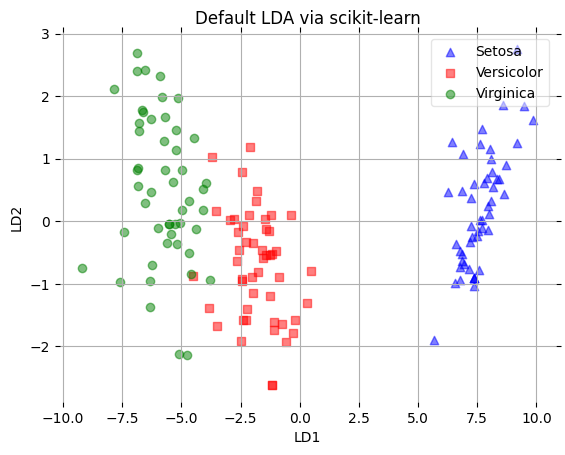

In [15]:
# import library

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import pyplot as plt

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}


# Reading in the dataset

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end


# use the LabelEncode from the scikit-learn library to convert the class labels into numbers: 1, 2, and 3

X = df.iloc[:,[0,1,2,3]].values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    plt.grid()
    plt.tight_layout
    plt.show()

plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [8]:
sklearn_lda = LDA(n_components=2)
ml_lda = sklearn_lda.fit(X, y)

In [9]:
ml_lda

LinearDiscriminantAnalysis(n_components=2)

In [10]:
X_new = X[:5,:]
X_new

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [11]:
ml_lda.predict(X_new)

array([1, 1, 1, 1, 1])

In [12]:
ml_lda.predict_proba(X_new)

array([[1.00000000e+00, 3.15158535e-22, 1.66324014e-42],
       [1.00000000e+00, 6.03245628e-18, 3.50133480e-37],
       [1.00000000e+00, 1.19815820e-19, 3.08361704e-39],
       [1.00000000e+00, 1.00820664e-16, 2.29510308e-35],
       [1.00000000e+00, 1.30055578e-22, 6.66252962e-43]])

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = ml_lda.predict(X)
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))

0.98
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


In [14]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       0.98      0.96      0.97        50
           3       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

